In [1]:
import sys; sys.path.insert(0, '..')
import cmdp.ch_parser as ch_parser
import cmdp.NYCtools as NYCtools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
m, targets = ch_parser.parse('NYCstreetnetwork.json')

In [ ]:
%%timeit
m.get_minInitCons(recompute=True);

In [ ]:
%%timeit
m.get_minInitCons(30, recompute=True);

In [ ]:
%%timeit
m.get_safe(100, recompute=True)

In [ ]:
%%timeit
m.get_positiveReachability(targets, 100, recompute=True)

In [ ]:
%%timeit
m.get_almostSureReachability(targets, 100, recompute=True)

In [ ]:
%%timeit
m.get_Buchi(targets, 100, recompute=True)

In [3]:
from energy_solver import *

In [ ]:
%%timeit
s = EnergySolver(m, cap=100, targets=targets)
strategy = s.get_strategy(BUCHI, recompute=True)

In [ ]:
%%timeit
s = EnergySolver(m, cap=100, targets=targets)
strategy = s.get_strategy(AS_REACH, recompute=True)

C:\Users\pranayt2\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Histogram of Buchi Computational Time. Mean: 1.8036 and SD: 0.1441')

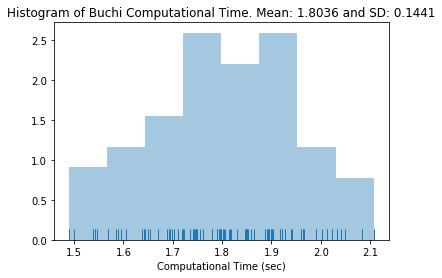

In [8]:
# computational time variation for different target sets - Buchi objective 
comptime = NYCtools.timeit_difftargets(m, cap=200, target_size = 100, num_samples=100, obj=BUCHI)
sns.distplot(list(comptime), kde=False, norm_hist=True, rug=True, axlabel='Computational Time (sec)').set_title('Histogram of Buchi Computational Time. Mean: {} and SD: {}'.format(round(np.mean(comptime),4), round(np.std(comptime),4)))

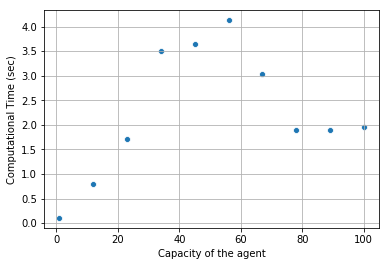

In [12]:
# computational time variation for different capacities - Buchi objective
comptime = NYCtools.timeit_diffcaps(m, targets, cap_bound = 100, num_samples = 10, num_tests=10, obj=BUCHI)
x_val = [pair[0] for pair in comptime]; y_val = [pair[1] for pair in comptime]
ax = sns.scatterplot(x_val, y_val)
ax.set_xlabel('Capacity of the agent'); ax.set_ylabel('Computational Time (sec)'); ax.grid(True)